In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits, load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [3]:
data = load_digits()
data_x = data.data
data_y = data.target

In [4]:
X = pd.DataFrame(data_x)
y = pd.DataFrame(data_y)

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
svc_model = SVC(kernel="linear")
svc_model.fit(Xtrain, ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [7]:
ypred = svc_model.predict(Xtest)

In [8]:
print(f"SVC linear model test accuracy = {accuracy_score(ytest, ypred)}")

SVC linear model test accuracy = 0.9777777777777777


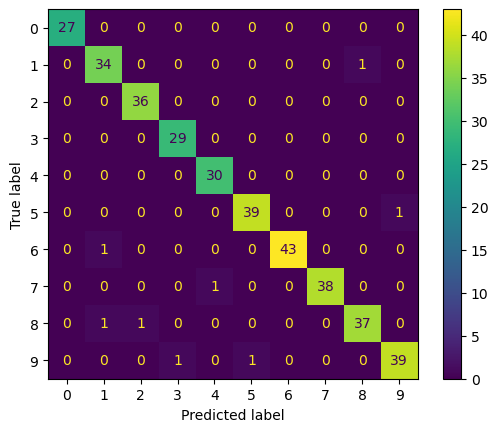

In [9]:
cm = confusion_matrix(ytest, ypred)
dcm = ConfusionMatrixDisplay(cm, display_labels=svc_model.classes_)
dcm.plot()
plt.show()

In [10]:
iris = load_iris()

In [11]:
X = iris.data[:,:2]
y = iris.target

In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [14]:
svc_model = SVC(kernel="linear")
svc_model.fit(Xtrain, ytrain)

SVC(kernel='linear')

In [15]:
ypred = svc_model.predict(Xtest)

In [16]:
print(f"SVC linear model test accuracy = {accuracy_score(ytest, ypred)}")

SVC linear model test accuracy = 0.7333333333333333


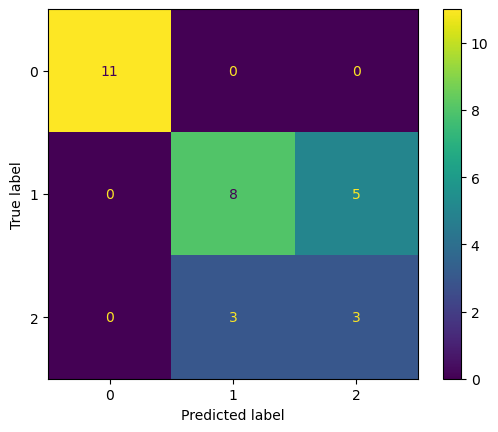

In [17]:
cm = confusion_matrix(ytest, ypred)
dcm = ConfusionMatrixDisplay(cm, display_labels=svc_model.classes_)
dcm.plot()
plt.show()

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_14036\840602032.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(Xtrain[ytrain == j, 0], Xtrain[ytrain == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=iris.target_names[j])


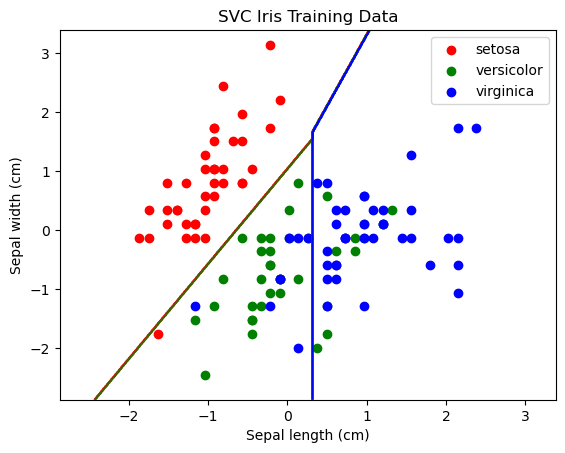

In [18]:
from matplotlib.colors import ListedColormap

x1, x2 = np.meshgrid(np.arange(start = Xtrain[:, 0].min()-1, stop = Xtrain[:, 0].max()+1, step=0.01), 
                     np.arange(start = Xtrain[:, 0].min()-1, stop = Xtrain[:, 0].max()+1, step=0.01))

plt.contour(x1, x2, svc_model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))

for i, j in enumerate(np.unique(ytrain)):
    plt.scatter(Xtrain[ytrain == j, 0], Xtrain[ytrain == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=iris.target_names[j])

plt.title("SVC Iris Training Data")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.show()
